#### 랜덤한 텐세그리티 형태의 그래프를 생성
1. networkx 라이브러리 기초공부
1. 랜덤하게 그래프를 생성
1. 평형조건 판단
1. 안정성 판단

##### 1. networkx library

In [1]:
import networkx as nx
nx.__version__

##### Create Graph: create, adding, nodes, edges

four types of graphs are supported:  
G = nx.Graph() # undirected graph  
DG = nx.DiGraph() # directed graphs  
MG = nx.MultiGraph() # can be many edges between nodes MDG  

In [2]:
G = nx.Graph()
G.add_node(0)
G.add_nodes_from([4,1,2]) # 리스트에 있는 노드를 한번에 추가

G.add_edge(0, 1)
G.add_edges_from([(0,2), (1,2)])

print(G.number_of_nodes(), G.number_of_edges())
nx.draw(G,with_labels=True)

##### Creation via add_path, add_cycle, add_star

In [3]:
G2  = nx.Graph()
nx.add_cycle(G2,[0,1,2,3,4,5])
nx.add_path(G2,[0,10,11,12],weight=3)
nx.add_star(G2,[6,7,8,9,21,22],weight=7)
nx.add_star(G2,[31,32,33,34,35],weight=4) # weight를 높이면 더 오밀조밀하게 모임

nx.draw(G2,with_labels=True)

##### Directed graph example

In [4]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5),(3,1,0.75)])
# DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')

print(list(DG.successors(1)),list(DG.neighbors(1)))
nx.draw(DG)

##### Number of nodes, edges

In [5]:
G = nx.Graph()
G.add_nodes_from([0,1])
G.add_edge(0,1)

# len(G) = number_of_nodes
# nuumber_of_edge는 간선 개수를 반환, size도 동일하게 간선 개수를 반환하지만 가중치가 있는 경우에 간선*가중치 합을 반환
len(G),G.number_of_nodes(),G.number_of_edges(),G.size()

##### Plotting
It is important that plotsate made in common matplotlib canvas,s o all familiar matplolib commads can be combined with networkx plots. that is advantage over igraph.

In [6]:
import matplotlib.pyplot as plt

##### Simplest plot - nx.draw(G)

In [ ]:
G = nx.tetrahedral_graph()
pos = nx.spring_layout(G)
nx.draw(G,with_labels=True)
print(pos)

In [ ]:
G = nx.Graph()
G.add_node(0, pos=(1,0))
G.add_node(1, pos=(0,1))
G.add_node(2, pos=(-1,0))
G.add_node(3, pos=(0,-1))

G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)])
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G,pos,with_labels=True)

In [ ]:

# nx.draw(G1,G2,G3,G4,G5)
# plt.title('dodecahedral_graph')
# plt.show()
import matplotlib.pyplot as plt

G1 = nx.dodecahedral_graph()
G2 = nx.truncated_cube_graph()
G3 = nx.icosahedral_graph()
G4 = nx.dodecahedral_graph()
G5 = nx.tetrahedral_graph()

# 그래프 리스트
graphs = [G1, G2, G3, G4, G5]
titles = [
    'dodecahedral_graph', 
    'truncated_cube_graph', 
    'icosahedral_graph', 
    'dodecahedral_graph', 
    'tetrahedral_graph'
]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, G in enumerate(graphs):
    nx.draw(G, ax=axes[i])
    axes[i].set_title(titles[i])

# 남는 빈 서브플롯 제거
for j in range(len(graphs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Create from Adjacency matrix

In [ ]:
import numpy as np
A = np.random.randint(0,2,size=(4,4)) # 0이상 2미만 (0~1)사이의 정수를 사이즈에 맞게 행렬로 생성
print(A)
G = nx.DiGraph(A)

nx.draw(G,with_labels=True)

##### Return adjacency matrix

In [ ]:
print(nx.to_numpy_array(G))
nx.to_numpy_matrix(G)


##### Peterson graph and subplots demo

In [ ]:
G =  nx.petersen_graph() # 피터센 그래프를 생성 - 10개의 노드와 15개의 간선으로 구성되고 대칭구조를 가짐ㅠ
fig = plt.figure(figsize=(10,5))
plt.subplot(121)

# shell레이아웃으로 그린다, nlist에는 노드를 두 개의 쉘로 그룹화 하여 배치하는데 
# 첫번째 노드에는 5~9, 두번째노드는 0~4
nx.draw_shell(G, nlist=[range(5,10),range(5)],with_labels=True,font_weight='bold')
plt.title('Subplot 1')
plt.subplot(122)

# 동일한 피터센 그래프를 기본 레이아웃(보통 spring layout)으로 그린다.
nx.draw(G,with_labels=True,font_weight='bold')
plt.title('Subplot 2')
plt.show()

##### Plot with edge weights nx.draw_networkx_edge_labels

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
i = 1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=0.98)
pos = nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show() 

In [ ]:
pos = nx.planar_layout(G) # 그래프의 구조를 고려하여 평면상에 노드들이 겹치지 않고 배치되도록 자동으로 계산된 좌표
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()


##### Use subplots from matplotlib

In [ ]:
import numpy as np 

G = nx.Graph()
# G.add_node(1)
G.add_nodes_from([0, 1,2])
#G.add_edge(0, 1)
G.add_edges_from([(0, 1), (1, 2), (0, 2)])
fig = plt.figure(figsize= (12,3))
plt.subplot(131)
nx.draw(G,   node_color= [0,0,0 ])
m1 = nx.algorithms.community.modularity(G, [{0,1,2}])
str1 = 'Partion: \n all nodes in one group \n'+ 'Modularity ' + str(np.round(m1,3) )
plt.title(str1)

plt.subplot(132)
nx.draw(G,   node_color= [0,1,2 ])
m1 = nx.algorithms.community.modularity(G, [{0},{1},{2}])
str1 = 'Partion: \n all nodes in different groups \n'+ 'Modularity ' + str(np.round(m1,3) )
plt.title(str1)

plt.subplot(133)
nx.draw(G,   node_color= [0,0,2 ])
m1 = nx.algorithms.community.modularity(G, [{0,1},{2}])
str1 = 'Partion: \n  Group1 - [0,1], Group2 - [2] \n'+ 'Modularity ' + str(np.round(m1,3) )
plt.title(str1)

plt.show()

##### Community detection (clustering)

In [ ]:
G = nx.barbell_graph(4,0)
c = nx.algorithms.community.modularity(G,[{0,1,2,3},{4,5,6,7}])
nx.draw(G,with_labels=True)
print(c)

In [59]:
G = nx.karate_club_graph()
nx.draw(G)

###### 랜덤한 그래프 생성하기
1. 그래프 생성
1. 노드 좌표얻기
1. N 행렬 구성하기
1. adjacency matrix 획득
1. adjacency matrix -> Connectivity matrix

In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.dodecahedral_graph()
pos  = nx.kamada_kawai_layout(G)

nx.draw(G,pos,with_labels=True)
plt.show()

In [17]:
for node, coords in pos.items():
    print(f"Node {node}: {coords}")

In [28]:
# create N matrix
num_nodes = len(pos)
N = np.zeros((2,num_nodes))
for i, (node, coords) in enumerate(pos.items()):
    N[0, i] = coords[0]
    N[1, i] = coords[1]

print(N.shape)
print(N)


아래 방법에서는 C'*C = A라고 했을때 A를 알고있더라도 분해를 통해 정확한 C를 도출할 수 없음

In [38]:
# create C matrix
adj_matrix = nx.to_numpy_matrix(G)
print(adj_matrix.shape)

# make C'*C matrix
adj_matrix = - adj_matrix
for i,node in  enumerate(G.nodes()):
    # print(i,"node",node,'has degree',G.degree(node))
    adj_matrix[i,i] = G.degree(node)

adj_matrix


In [74]:
# Create C mat
num_member = len(G.edges())
C = np.zeros((num_member,num_nodes))
print(C.shape)
for i,(u,v) in enumerate(G.edges()):
    # print(i,f'Edge from {u} to {v}')
    C[i,u] = 1
    C[i,v] = -1

C
    

In [140]:
# creatE M mat
M = N@C.T
M

In [98]:
import sympy as sp
def get_Sigma(i):
    num_component = num_member
    num_lambda = i
    num_gamma = num_component - num_lambda

    # lambda_vars = {}
    component = []
    count_lambda = 0
    count_gamma = 0

    for n in range(1,num_lambda+1):
        # lambda_name = f'l{n}'
        lambda_symbol = sp.symbols(f'l{n}')
        component.append(lambda_symbol)
        count_lambda += 1

    for m in range(1,num_gamma+1):
        # gamma_name = f'g{m}'
        gamma_symbol = sp.symbols(f'g{m}')
        component.append(gamma_symbol)
        count_gamma +=1


    Sigma = np.diag(component)
    return Sigma, count_lambda, count_gamma


In [99]:
Sigma,count_lambda,count_gamma = get_Sigma(3)
print(Sigma.shape)
print(count_lambda,count_gamma)
print(Sigma)

M*Sigma*C = 0을 풀어야 함  
행렬을 크로네커 prod를 써서 벡터화  
Ax = b의 형태로 변환한후 lingprog를 이용해서 해결  
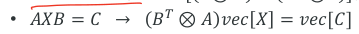

In [85]:
print(M.shape)
print(Sigma.shape)
print(C.shape)

In [121]:
# LP feasible
import numpy as np
from scipy.optimize import linprog

# M*S*C = 0 -> kron(C',M)*vec(S) = 0
A_eq = np.kron(C.T,M)
print(f"A_eq shape: {A_eq.shape}")  # 디버깅

vec_Sigma = Sigma.reshape(-1,order='F')
# print(vec_Sigma)

# for idx,value in enumerate(vec_Sigma):
#     if value == 0:
#         A_new = np.delete(A_eq,idx,axis=1)
zero_indices = [i for i, value in enumerate(vec_Sigma) if value == 0]
A_new = np.delete(A_eq, zero_indices, axis=1)

print(f"A_new shape: {A_new.shape}")

f = np.zeros(A_new.shape[1])


b_eq = np.zeros(A_new.shape[0])

# bound setting
lb_lambda = -np.inf * np.ones(count_lambda)
lb_gamma = np.full(count_gamma, 1e-6) # linprog에서는 이상만 먹혀서
lb = np.concatenate([lb_lambda,lb_gamma])

ub_lambda = np.inf * np.ones(count_lambda)
ub_gamma = np.inf * np.ones(count_gamma)
ub = np.concatenate([ub_lambda,ub_gamma])

bounds = list(zip(lb,ub))

# linprog
# eq = A_eq*x == b_eq
result = linprog(f,A_ub=None,b_ub=None, A_eq=A_new,b_eq=b_eq,bounds=bounds)

if result.success:
    print("feasible solution found")
    print(result.x)

else:
    print('Infeasible')






In [102]:
a = np.array([1,2,3])
b = np.array([4,5,6])

c = np.concatenate([a,b])
print(c)

In [111]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
# a.reshape(-1,1)
a.flatten(order='F')
a.reshape(-1,order='F')

In [112]:
A_new = np.delete(a,1,)

##### 노드의 순서를 바꿔서 N C M을 생성하면 해결되지않나? -> 가능한 모든 조합을 고려해보는거야

아니지 노드는 고정이고 C만 조정해야지
와 근데 C에서 row를 바꾸는 방법의 가지수는 30!이고 거기에 시그마 계산까지 수행하면 미쳐 날뛰는데?

In [142]:
print(N)
print(C)
print(M)

그렇다면 람다와 감마의 순서를 바꿔도 가능한지 보자

In [5]:
# Make Sigma_new
import sympy as sp

def generate_Sigma_combination(elements,num_members,current=[],result=[]):
    if len(current) == num_members:
        result.append(current)
        return
    
    for element in elements:
        generate_Sigma_combination(elements,num_members,current + [element], result)

num_member = 10
l,g = sp.symbols('l g')
elements = [l,g]
result = []
generate_Sigma_combination(elements, num_member,result=result)
print(len(result))

In [143]:
def generate_combinations(elements, length, current=[]):
    if len(current) == length:
        print("".join(current))
        return
    
    for element in elements:
        generate_combinations(elements, length, current + [element])

# 사용 예시
elements = ['A', 'B']
length = 5
generate_combinations(elements, length)